<a href="https://colab.research.google.com/github/Shiwei-Chen/DESC-624/blob/master/DESC_624_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col=['sepal_length','sepal_width','petal_length','petal_width','type']

data = pd.read_csv(url, names = col)

# Print first 5 rows of the dataframe
data.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


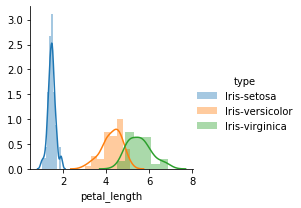

In [2]:
sns.FacetGrid(data,hue="type",size=3).map(sns.distplot,"petal_length").add_legend()
plt.show()

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Two Categorical Attributes**

In [0]:
iris = data

In [5]:
iris['sepal_width_binned'] = pd.cut(x = iris['sepal_width'], bins = [0, iris['sepal_width'].mean(), iris['sepal_width'].max()],
     labels=["small", "large"], right = False)


iris.head()

,sepal_length,sepal_width,petal_length,petal_width,type,sepal_width_binned
0,5.1,3.5,1.4,0.2,Iris-setosa,large
1,4.9,3.0,1.4,0.2,Iris-setosa,small
2,4.7,3.2,1.3,0.2,Iris-setosa,large
3,4.6,3.1,1.5,0.2,Iris-setosa,large
4,5.0,3.6,1.4,0.2,Iris-setosa,large


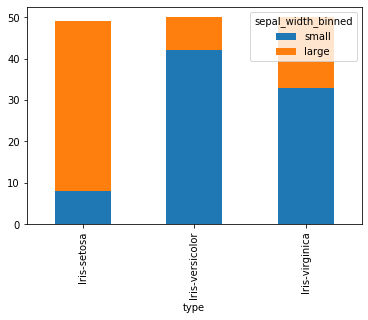

In [6]:
crosstab_01 = pd.crosstab(iris['type'], iris['sepal_width_binned'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_01.plot(kind='bar', stacked = True)

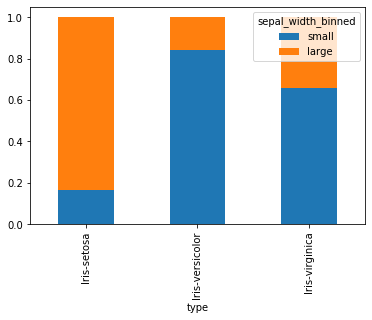

In [7]:
crosstab_norm.plot(kind='bar', stacked = True)

Observation: Proportion of sepal_width_binned changes based on type.

* Ha = yes it does
* H0 = no it does not

Chi square test

In [0]:
from scipy import stats

In [0]:
chi2_stat, pval, DoF, ex = stats.chi2_contingency(crosstab_01)

In [10]:
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(DoF)
print("\n")
print("===P-Value===")
print(pval)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
49.16489311606352


===Degrees of Freedom===
2


===P-Value===
2.1085267163365518e-11


===Contingency Table===
[[27.29530201 21.70469799]
 [27.85234899 22.14765101]
 [27.85234899 22.14765101]]


In [11]:
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

 we are rejecting null hypothesis


**One Numerical Attribute**

In [12]:
iris['petal_width'].mean()

1.1986666666666672

In [0]:
from scipy.stats import ttest_1samp

In [0]:
tset, pval = ttest_1samp(iris['petal_width'], 26)

In [15]:
print('p-values', pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

p-values 1.999810779949752e-227
 we are rejecting null hypothesis


**Numerical And Categorical**

In [0]:
iris_setosa=iris.loc[iris["type"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["type"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["type"]=="Iris-versicolor"]

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


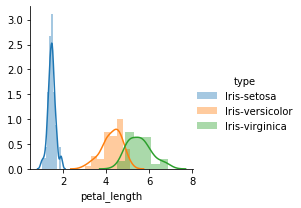

In [17]:
sns.FacetGrid(iris,hue="type",size=3).map(sns.distplot,"petal_length").add_legend()
plt.show()

Observation: There is a difference of petal_length between Iris-setosa, Iris-versicolor and Iris-virginica

* Ho = There is NOT
* Ha = There is 

ANOVA

In [18]:
F, p = stats.f_oneway(iris_versicolor['sepal_width'], iris_virginica['sepal_width'], iris_setosa['sepal_width'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  1.3279165184572065e-16
reject null hypothesis


**Numerical Attributes**

* Histogram
* Correlation
* Pairplots
* Scatter

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


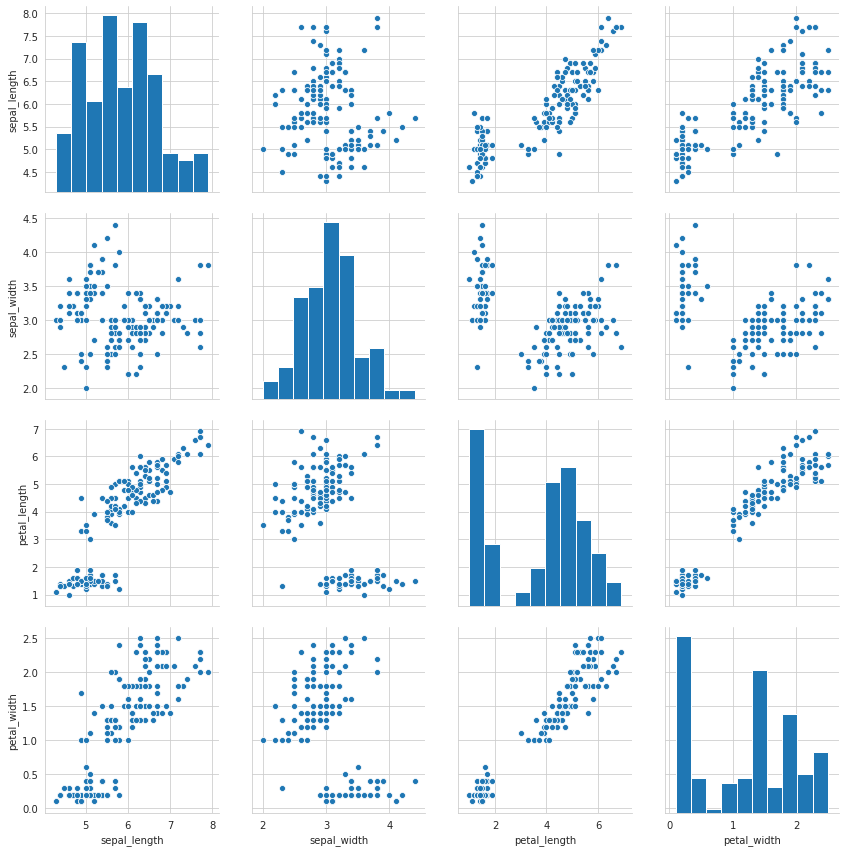

In [19]:
sns.set_style("whitegrid")
sns.pairplot(iris,size=3);
plt.show()

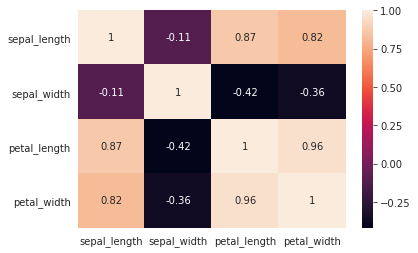

In [20]:
correlation_matrix = iris.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

**Regression**

Simple Linear Regression

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [0]:
X = iris['sepal_length'].values.reshape(-1,1) #predictors

y = iris['petal_width'].values.reshape(-1,1) #target

In [0]:
regressor = LinearRegression() #define the model

In [24]:
regressor.fit(X,y) #fit the model on predictors and target variables

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
regressor.intercept_

array([-3.2062769])

In [26]:
print(regressor.coef_)

[[0.75384088]]


In [0]:
y_pred = regressor.predict(X)

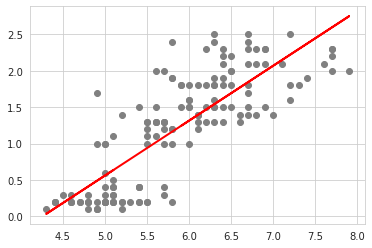

In [28]:
plt.scatter(X, y,  color='gray')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.show()

In [29]:
#model evaluation for training set

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R2 score:', metrics.r2_score(y, y_pred))

Mean Absolute Error: 0.36005144016138946
Mean Squared Error: 0.19146609071086385
Root Mean Squared Error: 0.4375683840394137
R2 score: 0.6690481463418159


**Multiple Linear Regression**

In [0]:
y = iris['petal_width'].values #this is our target

X = iris[['sepal_length', 'sepal_width']].values #predictors

In [0]:
regressor2 = LinearRegression()

In [32]:
regressor2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
coeff_df = pd.DataFrame(regressor2.coef_ )  
coeff_df

,0
0,0.726594
1,-0.475782


In [34]:
regressor2.intercept_

-1.594023066327346

In [35]:
y_pred = regressor2.predict(X)
dftest = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df1 = dftest.head(25)
df1.head()

,Actual,Predicted
0,0.2,0.446366
1,0.2,0.538939
2,0.2,0.298464
3,0.2,0.273383
4,0.2,0.326129


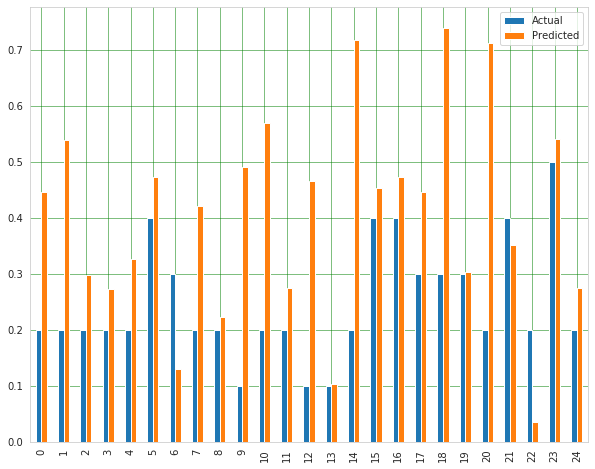

In [36]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [37]:
#model evaluation for training set

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R2 score:', metrics.r2_score(y, y_pred))

Mean Absolute Error: 0.3075849361842316
Mean Squared Error: 0.14969723186280046
Root Mean Squared Error: 0.38690726519774793
R2 score: 0.7412462113340588


**Classification**

In [0]:
import matplotlib.pyplot as plt  
import pandas as pd  
#importing the necessary packages  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB 

from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.dummy import DummyClassifier
from sklearn.metrics import *

import seaborn as sns

In [39]:
#downloading the iris dataset, splitting it into train set and validation set 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col=['sepal_length','sepal_width','petal_length','petal_width','type']

df = pd.read_csv(url, names = col)

# Print first 5 rows of the dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df2 = df
df2['type']  = df2['type'].replace({'Iris-setosa': 0})
df2['type']  = df2['type'].replace({'Iris-versicolor': 1})
df2['type']  = df2['type'].replace({'Iris-virginica': 2})
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
t1 = pd.crosstab(df['type'], df['sepal_length'])
t1['Total'] = t1.sum(axis=1)
t1.loc['Total'] = t1.sum()
t1

sepal_length,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9,Total
type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,3,1,4,2,5,4,8,8,3,1,5,2,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50
1,0,0,0,0,0,0,1,2,1,1,0,1,5,5,5,3,2,4,4,2,3,2,1,2,3,1,1,1,0,0,0,0,0,0,0,50
2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,3,1,2,2,2,6,5,4,0,5,2,3,0,1,3,1,1,1,4,1,50
Total,1,3,1,4,2,5,6,10,9,4,1,6,7,6,8,7,3,6,6,4,9,7,5,2,8,3,4,1,1,3,1,1,1,4,1,150


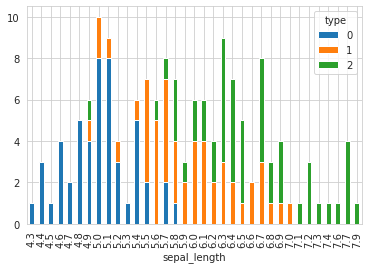

In [42]:
t1_plot = pd.crosstab(df['sepal_length'], df['type'])
t1_plot.plot(kind='bar', stacked = True)

In [0]:
#define predictors and target
X = df2[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] #predictors

y = df2[['type']] #target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
NB = GaussianNB()

In [46]:
nb1 = NB.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y_predict = nb1.predict(X_test)

In [0]:
y_predict = pd.DataFrame(y_predict,index = y_test.index, columns = ['predict'])

In [49]:
dftest = pd.concat([y_test, y_predict])
df3 = dftest.head(25)
df3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,predict,type
114,NaN,2.0
62,NaN,1.0
33,NaN,0.0
107,NaN,2.0
7,NaN,0.0


In [0]:
#Build a "dummy" classifier that predicts every observation to be the most frequent class, in this case 'no-exit')
#This is our Baseline Model
dummy = DummyClassifier(strategy= 'uniform')
dumb = dummy.fit(X_train,y_train)
dumb_pred = dumb.predict(X_test)
dumb_pred_prob = dumb.predict_proba(X_test)

In [51]:
print("Test accuracy (Naive Bayes) =", 100*nb1.score(X_test,y_test), end="% \n\n")

print("Test accuracy (Dummy Classifier) =", 100*dumb.score(dumb_pred,y_test), end="%")

Test accuracy (Naive Bayes) = 100.0% 

Test accuracy (Dummy Classifier) = 36.84210526315789%

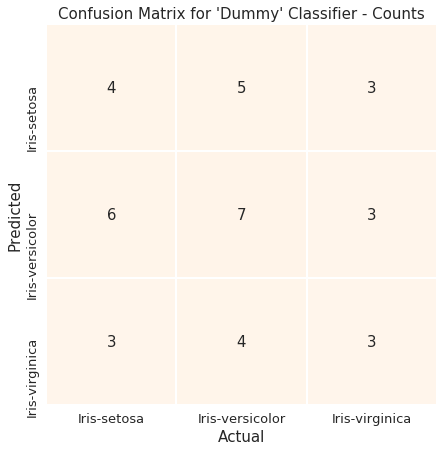

In [52]:
#generate confusion matrix for Dummy classifier
cm_dummy = confusion_matrix(y_test, dumb_pred)
#put it into a dataframe for seaborn plot function
cm_dummy_df = pd.DataFrame(cm_dummy)

#Use a seaborn heatmap to plot confusion matrices
#The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
#annot = True includes the numbers in each box
#vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_dummy_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["Iris-setosa","Iris-versicolor", 'Iris-virginica'], yticklabels=["Iris-setosa","Iris-versicolor", 'Iris-virginica'])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["Iris-setosa","Iris-versicolor", 'Iris-virginica'], fontsize=13)
ax.set_yticklabels(["Iris-setosa","Iris-versicolor", 'Iris-virginica'], fontsize=13)
plt.title("Confusion Matrix for 'Dummy' Classifier - Counts", fontsize=15)

plt.show()

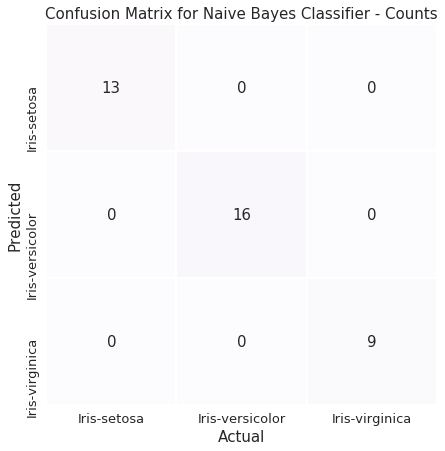

In [53]:
#generate confusion matrix
cm_nb = confusion_matrix(y_test, y_predict)
#put it into a dataframe
cm_nb_df = pd.DataFrame(cm_nb)

#plot CM
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(pd.DataFrame(cm_nb_df.T), annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=500, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["Iris-setosa","Iris-versicolor", 'Iris-virginica'], yticklabels=["Iris-setosa","Iris-versicolor", 'Iris-virginica'])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["Iris-setosa","Iris-versicolor", 'Iris-virginica'], fontsize=13)
ax.set_yticklabels(["Iris-setosa","Iris-versicolor", 'Iris-virginica'], fontsize=13)
plt.title("Confusion Matrix for Naive Bayes Classifier - Counts", fontsize=15)
plt.show()

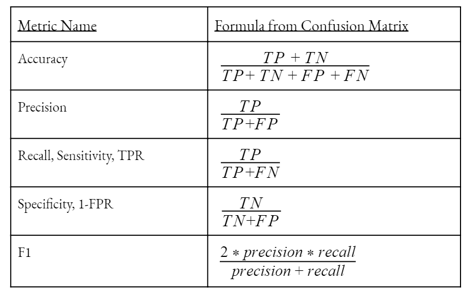

In [54]:
#generating a report to extract the measure of interest using built-in sklearn function
report = classification_report(y_test,dumb_pred,digits=3,output_dict = True)

print("Naive Bayes:")
print("Accuracy = {0:0.3f}".format(report["accuracy"]))
print("Iris-type 1 Precision = {0:0.3f}".format(report["1"]["precision"]))
print("Iris-type 1 Specificity = {0:0.3f}".format(report["1"]["recall"]))
print("Iris-type 1 Sensitivity = {0:0.3f}".format(report["1"]["recall"]))
print("Iris-type 1 F1-score = {0:0.3f}".format(report["1"]["f1-score"]))

Naive Bayes:
Accuracy = 0.368
Iris-type 1 Precision = 0.438
Iris-type 1 Specificity = 0.438
Iris-type 1 Sensitivity = 0.438
Iris-type 1 F1-score = 0.438


**ANN Classification**

In [55]:
#downloading the iris dataset, splitting it into train set and validation set 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col=['sepal_length','sepal_width','petal_length','petal_width','type']

df = pd.read_csv(url, names = col)

# Print first 5 rows of the dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df2 = df
df2['type']  = df2['type'].replace({'Iris-setosa': 0})
df2['type']  = df2['type'].replace({'Iris-versicolor': 1})
df2['type']  = df2['type'].replace({'Iris-virginica': 2})
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
X = df2[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] #predictors

y = df2[['type']] #target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
ANN = MLPClassifier(hidden_layer_sizes=(50,), max_iter= 1000)

In [61]:
ANN.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
y_predict = ANN.predict(X_test)

In [63]:
print("Accuracy MLP ANN: {:.2f}".format(ANN.score(X_test, y_predict)))

Accuracy MLP ANN: 1.00
